# Explore Data Science Academy

## Importing Libraries

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tweepy
from textblob import TextBlob

import re
import string 
import nltk

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.svm import SVC, LinearSVC
# Model perfromance matrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

## Loading Data

In [2]:
df_train = pd.read_csv('train_set.csv')
df_test = pd.read_csv('test_set.csv')

## Exploratory Data Analysis 

In [3]:
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [4]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [5]:
df_train['lang_id'].shape

(33000,)

In [6]:
df_test['index'].shape

(5682,)

In [7]:
# plotting the wordcloud
allwords = ' '.join([txt for txt in df_train['text']])
WordCloudtest = WordCloud(width = 800, height = 500, random_state = 21 , max_font_size = 119).generate(allwords)
plt.imshow(WordCloudtest, interpolation = 'bilinear')
plt.axis('off')
plt.show

NameError: name 'WordCloud' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

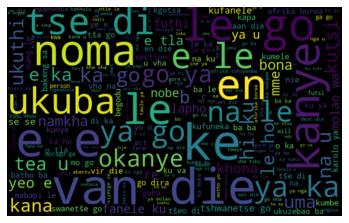

In [58]:
# plotting the wordcloud
allwords = ' '.join([txt for txt in df_test['text']])
WordCloudtest = WordCloud(width = 800, height = 500, random_state = 21 , max_font_size = 119).generate(allwords)
plt.imshow(WordCloudtest, interpolation = 'bilinear')
plt.axis('off')
plt.show

## Data engineering 

In [9]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'web-url'
df_train['text'] = df_train['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)
df_test['text'] = df_test['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [10]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [14]:
def clean_message(text):
    
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  #remove @mentions
    text = re.sub(r'#', '', text)              #removing '#'
    text = re.sub(r'rt[\s]+', '', text)        #removing rt
    text = re.sub(r'https?:\/\/\S+', '', text) #removing url if exist
    text = re.sub(r':', '', text)              # removing ':'
    text = re.sub(r'_', '', text)              # removing the underscore
    text = re.sub(r'imoji', '', text)          # removing imojis
    text = re.sub(r'\/', '', text)
    text = re.sub(r'[0-9]', '', text)
    
    return text

# cleaning text
df_train['text'] = df_train['text'].apply(clean_message)
df_test['text'] = df_test['text'].apply(clean_message)


In [15]:
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])  

In [16]:
df_train['text'] =df_train['text'].apply(remove_punctuation)
df_test['text'] = df_test['text'].apply(remove_punctuation)

In [17]:
df_train.head()

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [18]:
df_test.head()

,index,text
0,1,Mmasepala fa maemo a a kgethegileng a letlelel...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


## Data Modeling

In [22]:
model = TfidfVectorizer(max_features=1000000)

In [23]:
X = model.fit_transform(df_train['text'])
y = df_train['lang_id']

In [24]:
test_x = model.transform(df_test['text'])

In [25]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.1, random_state=23)

**support vector machine algorithm**

In [26]:
vector = SVC(kernel='linear')

In [27]:
vector.fit(X_train, y_train)

SVC(kernel='linear')

In [28]:
pred_vector = vector.predict(X_test)

In [29]:
print(accuracy_score(y_test, pred_vector))

0.9963636363636363


In [30]:
algor = vector.predict(test_x)

In [32]:
final_pred = pd.DataFrame({"index":df_test['index'], "lang_id":algor}).set_index("index")
final_pred

,lang_id
index,
1,ssw
2,nbl
3,ven
4,ssw
5,ssw
...,...
5678,ssw
5679,nso
5680,sot


In [33]:
final_pred.to_csv('svc_pred1.csv')

**Linear svc**

In [34]:
lsvc = LinearSVC()

In [35]:
lsvc.fit(X_train, y_train)

LinearSVC()

In [36]:
lin_svc = lsvc.predict(X_test)

In [37]:
print(accuracy_score(y_test, lin_svc))

0.996969696969697


In [38]:
lin_sub = lsvc.predict(test_x)

In [39]:
final_pred1 = pd.DataFrame({"index":df_test['index'], "lang_id":lin_sub}).set_index("index")
final_pred1

,lang_id
index,
1,tsn
2,nbl
3,ven
4,ssw
5,afr
...,...
5678,eng
5679,nso
5680,sot


In [40]:
final_pred1.to_csv('lsvc_pred.csv')

**Multinomial naive bayes**

In [41]:
mult = MultinomialNB()

In [42]:
mult.fit(X_train, y_train)

MultinomialNB()

In [43]:
mult_pred = mult.predict(X_test)

In [44]:
print(accuracy_score(y_test, mult_pred))

0.9984848484848485


In [45]:
pred_mul = lsvc.predict(test_x)

In [46]:
final_pred2= pd.DataFrame({"index":df_test['index'], "lang_id":pred_mul}).set_index("index")
final_pred2

,lang_id
index,
1,tsn
2,nbl
3,ven
4,ssw
5,afr
...,...
5678,eng
5679,nso
5680,sot


In [47]:
final_pred2.to_csv('multinomial.csv')

**Logistic regression**

In [48]:
lr = LogisticRegression()

In [49]:
lr.fit(X_train, y_train)

LogisticRegression()

In [50]:
log_pred = lr.predict(X_test)

In [51]:
print(accuracy_score(y_test, log_pred))

0.9954545454545455


In [52]:
pred_log=lsvc.predict(test_x)

In [53]:
final_pred3= pd.DataFrame({"index":df_test['index'], "lang_id":pred_log}).set_index("index")
final_pred3

,lang_id
index,
1,tsn
2,nbl
3,ven
4,ssw
5,afr
...,...
5678,eng
5679,nso
5680,sot


In [54]:
final_pred3.to_csv('log.csv')

## Conclusion 

From the data that i had and the algorithms i have realised that by checking the f1-score my models perfom differently.
first i used the support vector machine wich gave me an f1 score of 0.996,
secondly i used the linear support vector machine which i got an f1 score of 0.997,
thirdly i used logistic regression which gave me an f1 score of 0.995 , then lastly i used the MultinomialNB and i got an f1 score of 0.998 which is better than the two above.

Then from the information above i conclude that MultinomialNB was the best algorithm for my data